In [183]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from random import randint
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

In [254]:
raw2 = pd.read_csv('Biomechanical_Data_2classes.csv')
raw3 = pd.read_csv('Biomechanical_Data_3classes.csv')

In [3]:
raw2['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [4]:
raw3['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [5]:
raw2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [6]:
raw2['class'] = raw2['class'].map({'Normal': 1, 'Abnormal':0})

In [238]:
raw2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [8]:
raw_merged = pd.merge(left = raw2, right = raw3,left_on=['pelvic_incidence', 'lumbar_lordosis_angle',
        'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'], right_on= ['pelvic_incidence', 'lumbar_lordosis_angle',
        'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'], how = 'inner')

In [9]:
raw_merged.columns, raw2.columns, raw3.columns

(Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
        'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class_x',
        'pelvic_tilt', 'class_y'],
       dtype='object'),
 Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
        'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
       dtype='object'),
 Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
        'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
       dtype='object'))

In [10]:
raw_merged[['class_x', 'class_y']].value_counts()

class_x  class_y          
0        Spondylolisthesis    150
1        Normal               100
0        Hernia                60
dtype: int64

In [211]:
raw2[raw2['degree_spondylolisthesis']<0].shape

(58, 7)

In [212]:
df2 = raw2.copy()

In [213]:
X2 = df2.drop('class', axis=1).copy()
y2 = df2['class'].copy()

In [214]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=70, random_state=42 )

In [215]:
y2_train.value_counts()

0    160
1     80
Name: class, dtype: int64

In [216]:
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((240, 6), (70, 6), (240,), (70,))

In [217]:
k = [8, 16, 32]
dt1 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=8)
dt2 = DecisionTreeClassifier(criterion = 'entropy',min_samples_leaf=16)
dt3 = DecisionTreeClassifier(criterion = 'entropy',min_samples_leaf=32)

model1 = dt1.fit(X2_train, y2_train)
model2 = dt2.fit(X2_train, y2_train)
model3 = dt3.fit(X2_train, y2_train)

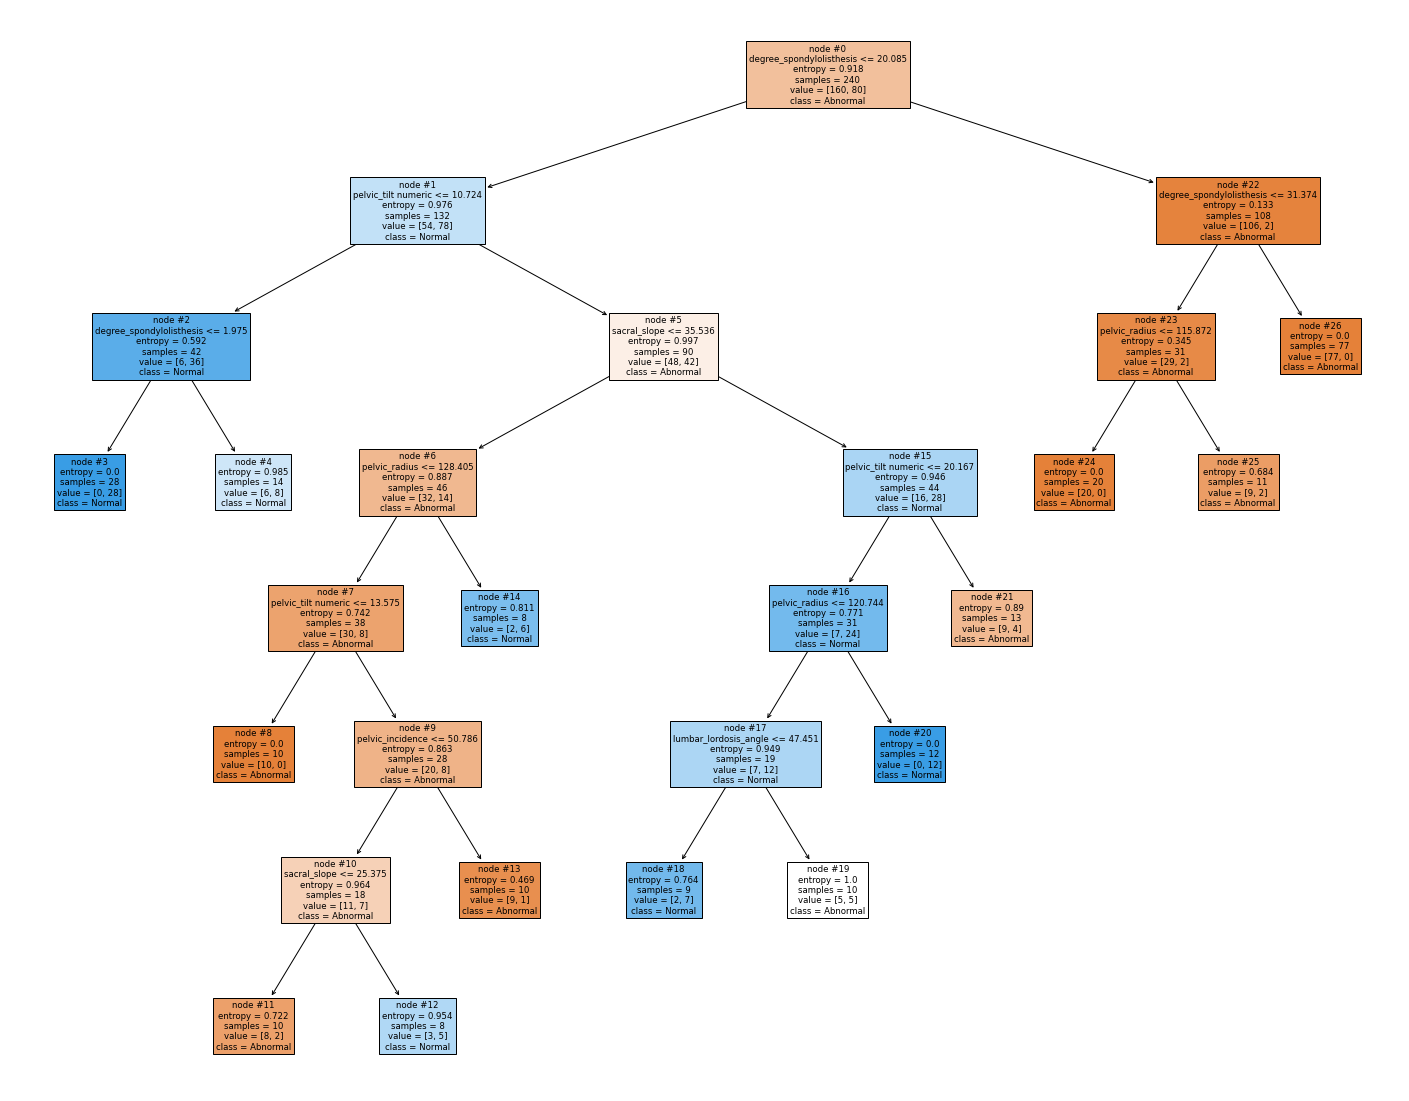

In [218]:
fig = plt.figure(figsize=(25,20))
tree1 = tree.plot_tree(dt1, 
                       feature_names=X2.columns, 
                       class_names=['Abnormal','Normal'], 
                       node_ids=True, 
                       filled=True)

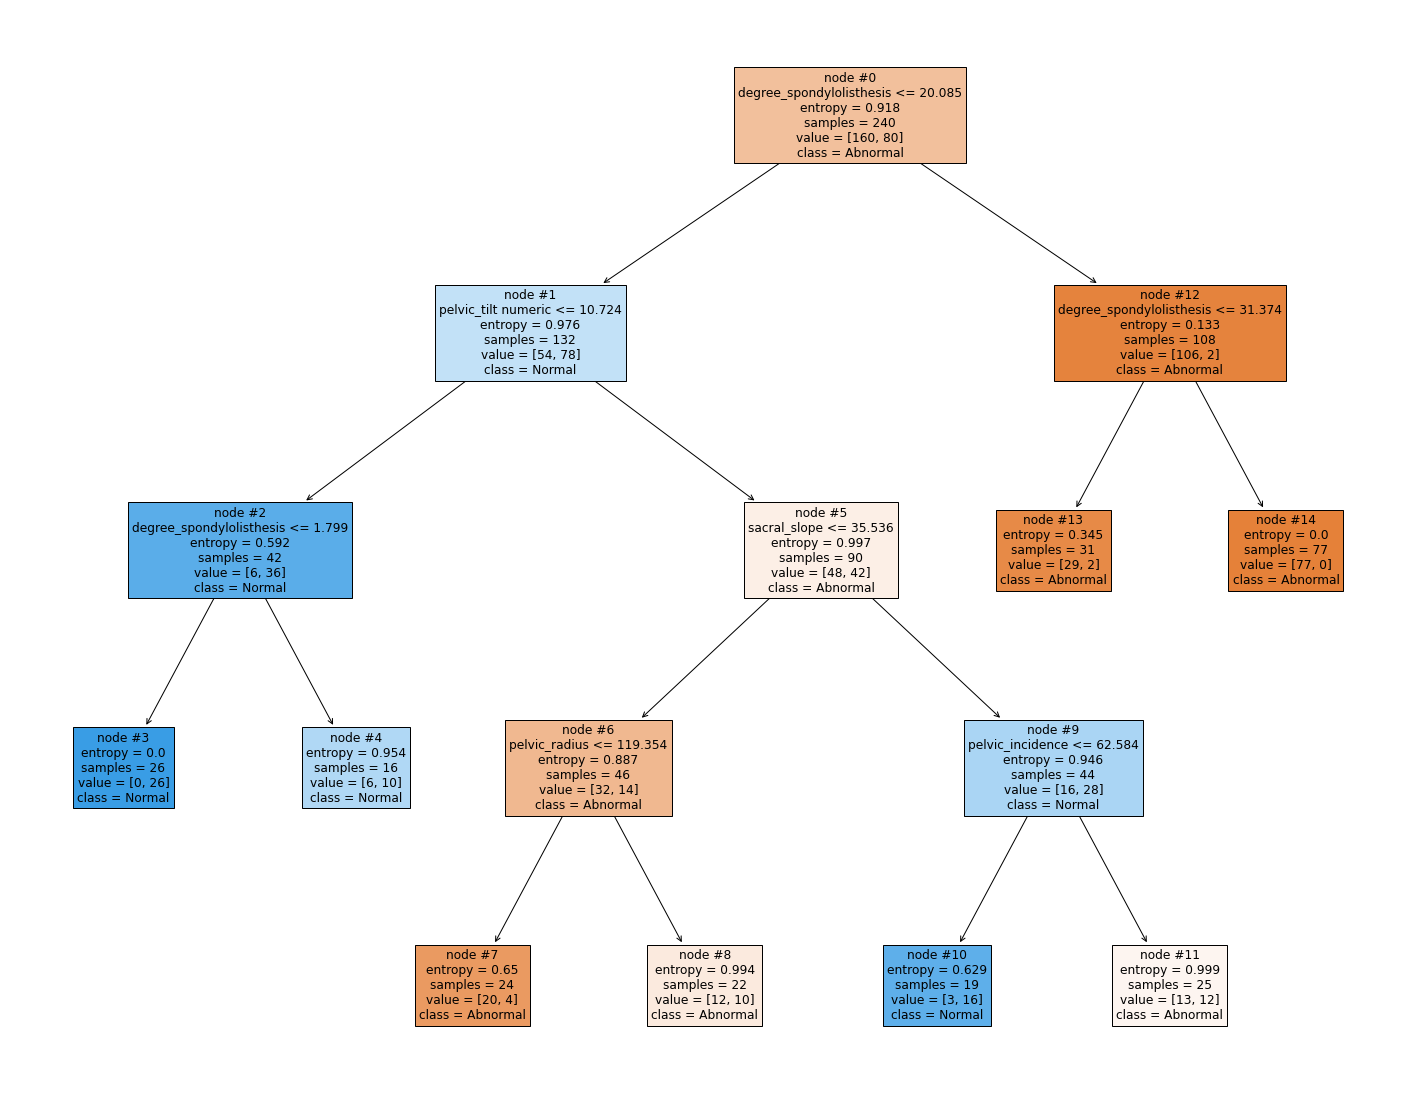

In [219]:
fig = plt.figure(figsize=(25,20))
tree2 = tree.plot_tree(dt2, 
                       feature_names=X2.columns, 
                       class_names=['Abnormal','Normal'], 
                       node_ids=True, 
                       filled=True)

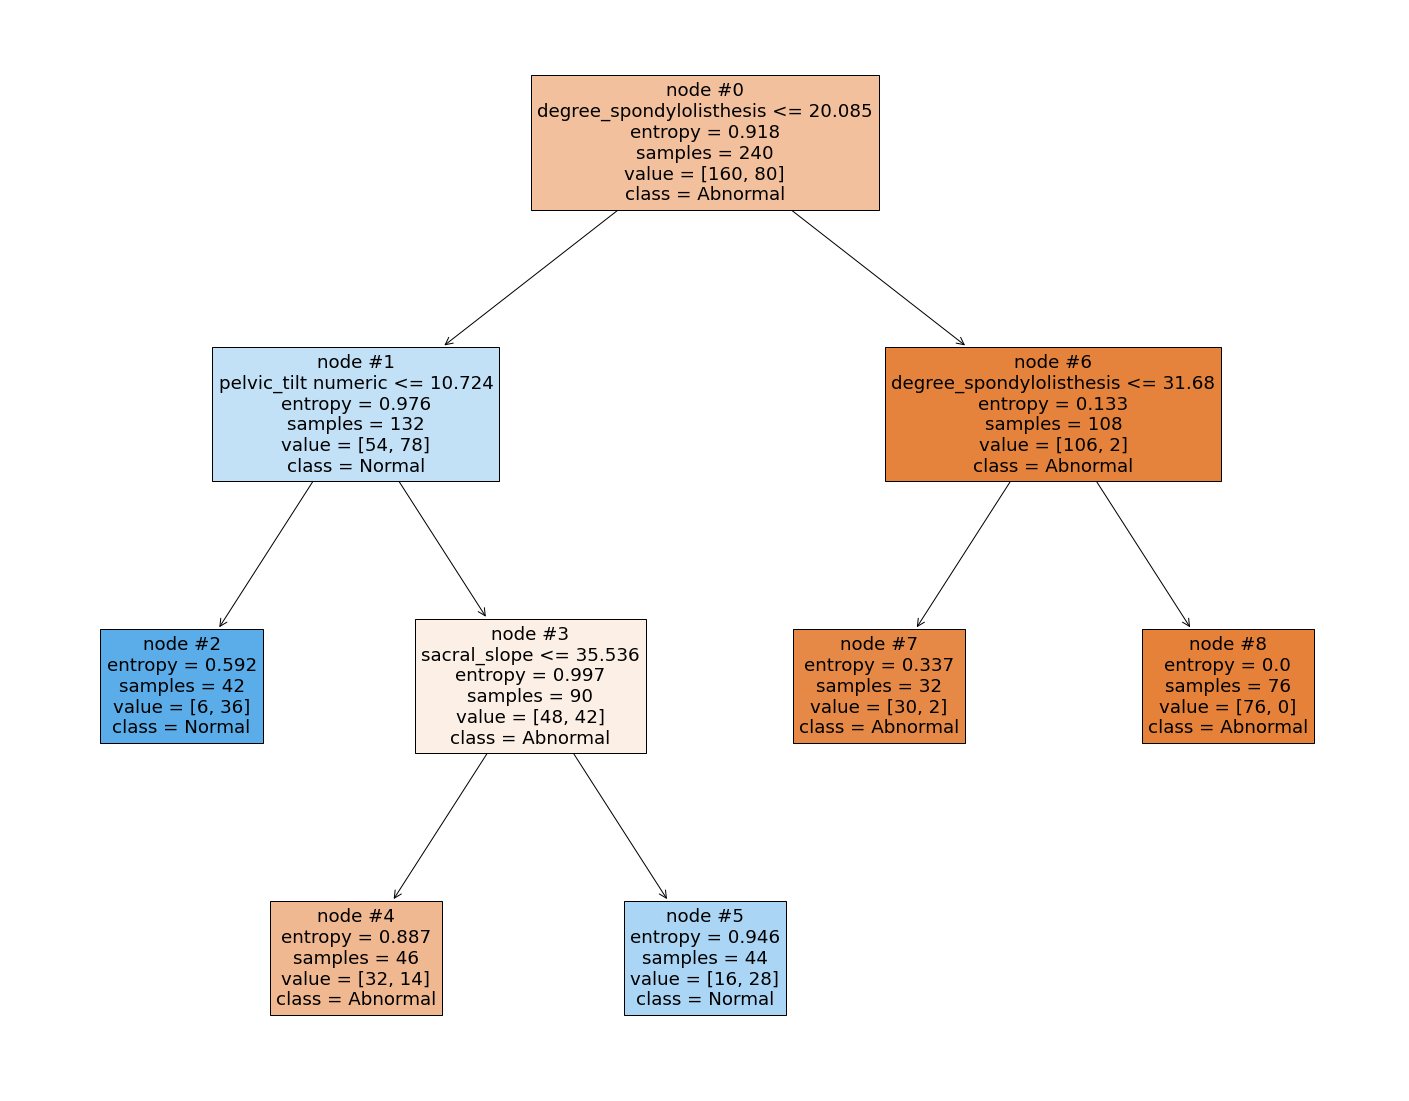

In [220]:
fig = plt.figure(figsize=(25,20))
tree3 = tree.plot_tree(dt3, 
                       feature_names=X2.columns, 
                       class_names=['Abnormal','Normal'], 
                       node_ids=True, 
                       filled=True)

In [222]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'
    
# TO export the decision tree summary as text
from sklearn.tree import export_text
tree1_rules = export_text(dt1, feature_names=list(X2.columns))
tree2_rules = export_text(dt2, feature_names=list(X2.columns))
tree3_rules = export_text(dt3, feature_names=list(X2.columns))

print(color.BOLD + 'Decision Tree with min_samples_leaf =   8' + color.END, '\n\n', tree1_rules,'\n',
      color.BOLD + 'Decision Tree with min_samples_leaf =  16' + color.END, '\n\n', tree2_rules,'\n',
      color.BOLD + 'Decision Tree with min_samples_leaf =  32' + color.END, '\n\n', tree3_rules)

Decision Tree with min_samples_leaf =   8 

 |--- degree_spondylolisthesis <= 20.09
|   |--- pelvic_tilt numeric <= 10.72
|   |   |--- degree_spondylolisthesis <= 1.97
|   |   |   |--- class: 1
|   |   |--- degree_spondylolisthesis >  1.97
|   |   |   |--- class: 1
|   |--- pelvic_tilt numeric >  10.72
|   |   |--- sacral_slope <= 35.54
|   |   |   |--- pelvic_radius <= 128.41
|   |   |   |   |--- pelvic_tilt numeric <= 13.58
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- pelvic_tilt numeric >  13.58
|   |   |   |   |   |--- pelvic_incidence <= 50.79
|   |   |   |   |   |   |--- sacral_slope <= 25.37
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- sacral_slope >  25.37
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- pelvic_incidence >  50.79
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- pelvic_radius >  128.41
|   |   |   |   |--- class: 1
|   |   |--- sacral_slope >  35.54
|   |   |   |--- pelvic_tilt numeric <= 20.17
|   |   


### Comparative Analysis of the Decision Trees

Following is a summary and the analysis of the three decision trees obtained by changing the values of the hyperparameter _'min_samples_leaf'_ to {_8, 16, 32_} [min_samples_leaf is a hyperparameter that gievrns the minimum number of datapoints to be present in a node after a split is carried out. Its function is make the model robust to outliers and, thus, reduce overfitting ]. Thus, it is reasonable to expect a Decision Tree with lower min_samples_leaf to have more nodes and a larger depth.<br> The criteria used to calculate the information gain is the **'entropy'**

To summarize the decision trees, we examine first the decision tree itself by looking at the number of nodes created(splits), the values at which the split is carried out, the depth of the trees and the information gain at eaxh stage.


| Min Points per leaf node|8|16|32|
|-------------------------|-|--|--|
| Total Number of nodes   |26|14|8|
|Maximum Depth            |7|4 |3 |

<br>

It is worth noting that all the three trees made the first split at _degree_spondylolisthesis <= 20.09_ . <br>All the nodes to the right of the split i.e. with _degree_spondylolisthesis >= 20.09_ are classified as **Abnormal** in all the trees. This suggest heavy correlation between high values of _degree_spondylolisthesis_ and the diagnosis. <br>
Looking at ths information, the trees with greater depth and higher number of nodes do not provide any additinal information through further splits. However, the difference in the trees arises for values of _degree_spondylolisthesis <= 20.09_.<br>The second split for all the three trees is common too at _pelvic_tilt numeric <= 10.72_. For the Third decision tree, the points with _pelvic_tilt numeric >= 10.72 area classified as **Abnormal** while the others area classified as **Normal**. In the trees 1 and 2, however, there is a further split at _lumbar_lordosis_angle_ to futher split the classes. **This is a direct consequene of allowing the tree to split further because of the lower restriction on the number of points in the leaf node. While the 3rd tree with a _min_samples_leaf=32_ has no such opportunity.**

To assess which of the trees is the best, we must look towards the information gained by the trees by being able to perform more splits compared to the Tree 3. Tree 1 and 2 do appear to be finding more information when compared to the Tree 3 (by observing node #3 in both the trees), however, Tree 1 does not gain any forther information by making further splits as the lower nodes are still classified as **Normal**. Therefore, It would appear that the **Tree 2 is the best among the three on the basis of information gained in minimum tree size**. 
 

In [225]:
y2_1_pred = model1.predict(X2_test)
y2_2_pred = model2.predict(X2_test)
y2_3_pred = model3.predict(X2_test)

In [237]:
X2_train.shape

(240, 6)

In [239]:
  
display('CONFUSION MATRIX FOR THE THREE DECISION TREES','Decision Tree with min_samples_leaf =   8', 
        pd.DataFrame(cm(y2_test, y2_1_pred), 
                     index=['Actual Abnormal', 'Actual Normal'], 
                     columns=['Predicted Abnormal', 'Predicted Normal']),
        'Decision Tree with min_samples_leaf =   16',
        pd.DataFrame(cm(y2_test, y2_2_pred), 
                     index=['Actual Abnormal', 'Actual Normal'], 
                     columns=['Predicted Abnormal', 'Predicted Normal']),
        'Decision Tree with min_samples_leaf =   32' ,
        pd.DataFrame(cm(y2_test, y2_3_pred), 
                     index=['Actual Abnormal', 'Actual Normal'], 
                     columns=['Predicted Abnormal', 'Predicted Normal']))

'CONFUSION MATRIX FOR THE THREE DECISION TREES'

'Decision Tree with min_samples_leaf =   8'

,Predicted Abnormal,Predicted Normal
Actual Abnormal,44,6
Actual Normal,9,11


'Decision Tree with min_samples_leaf =   16'

,Predicted Abnormal,Predicted Normal
Actual Abnormal,48,2
Actual Normal,14,6


'Decision Tree with min_samples_leaf =   32'

,Predicted Abnormal,Predicted Normal
Actual Abnormal,47,3
Actual Normal,6,14


In [240]:
classes = ['Abnormal', 'Normal']
print(classification_report(y2_test, y2_1_pred, target_names=classes), classification_report(y2_test, y2_2_pred, target_names=classes), classification_report(y2_test, y2_3_pred, target_names=classes))

              precision    recall  f1-score   support

    Abnormal       0.83      0.88      0.85        50
      Normal       0.65      0.55      0.59        20

    accuracy                           0.79        70
   macro avg       0.74      0.72      0.72        70
weighted avg       0.78      0.79      0.78        70
               precision    recall  f1-score   support

    Abnormal       0.77      0.96      0.86        50
      Normal       0.75      0.30      0.43        20

    accuracy                           0.77        70
   macro avg       0.76      0.63      0.64        70
weighted avg       0.77      0.77      0.73        70
               precision    recall  f1-score   support

    Abnormal       0.89      0.94      0.91        50
      Normal       0.82      0.70      0.76        20

    accuracy                           0.87        70
   macro avg       0.86      0.82      0.83        70
weighted avg       0.87      0.87      0.87        70




#### __Confusion Matrix__


##### **Decision Tree with min_samples_leaf =   8 (Decision Tree 1)**

|                |    Predicted Abnormal |	Predicted Normal |
|----------------|-----------------------|-------------------|
|Actual Abnormal |	            44 	     | 6                 | 
| Actual Normal  |                    9  |	11               | 

##### **Decision Tree with min_samples_leaf =   16 (Decision Tree 2)**

|                |    Predicted Abnormal |	Predicted Normal |
|----------------|-----------------------|-------------------|
|Actual Abnormal |	            48 	     | 2                 | 
| Actual Normal  |                    14 |	6                | 


##### **Decision Tree with min_samples_leaf =   32 (Decision Tree 3)**

|                |    Predicted Abnormal |	Predicted Normal |
|----------------|-----------------------|-------------------|
|Actual Abnormal |	            47 	     | 3                 | 
| Actual Normal  |                    6  |	14               | 
           
           

#### __Model Scores__
##### **Decision Tree with min_samples_leaf =   8 (Decision Tree 1)**


|         | precision  |  recall | f1-score |  support |
|---------|------------|---------|----------|----------|
|Abnormal |      0.83  |    0.88 |    0.85  |     50   |
|  Normal |      0.65  |    0.55 |    0.59  |     20   |
|Accuracy |            |         |     0.79 |       70 |

##### **Decision Tree with min_samples_leaf =   16 (Decision Tree 2)**

|         | precision  |  recall | f1-score |  support |
|---------|------------|---------|----------|----------|
|Abnormal |      0.77  |    0.96 |    0.86  |     50   |
|  Normal |      0.75  |    0.40 |    0.43  |     20   |
|Accuracy |            |         |     0.77 |     70   |



##### **Decision Tree with min_samples_leaf =   32 (Decision Tree 3)**

|         | precision  |  recall | f1-score |  support |
|---------|------------|---------|----------|----------|
|Abnormal |      0.89  |    0.94 |    0.91  |     50   |
|  Normal |      0.82  |    0.70 |    0.76  |     20   |
|Accuracy |            |         |    0.87  |     70   |


#####  Analysis:
Observing the above data, we can see that the decision tree 3 (min_samples_leaf=32) has the highest accuracy and f1-score among all the three models and thus can be easily concluded to be the best model.<br><br> However, looking closer at the confusion matrix, to guage the actual potential of the model in correctly identifying the abnormal cases, we come across an entirely different story, we can see that the decision tree 1 has misclassified 6 Abnormal cases as Normal, while the misclassification error of the decision tree 3 (with min_samples_leaf=32) is 3. <br><br>Considering the cost of misclassification in this case i.e. diagnosing a medical condition, misclassification carries with it huge costs for both the patient, the health care institutions like the Hospitals and Insurance agencies. <br><br>Therefore, concluding that the Decision Tree 1 is the best can have grave consequences in real life. By this criterion, one may conclude however that the Decision Tree 2 (#misclassified abnormal points = 2) is the best classifier model among the three as it has the **lowest rate of False Negatives**.

In [ ]:
probas = dt1.predict_proba(X2_train)

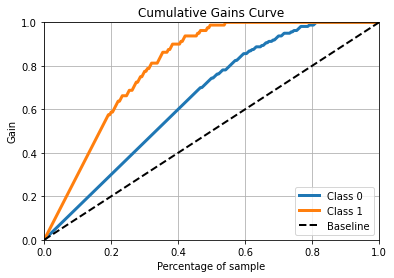

In [79]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y2_train, probas)
plt.show()


In [256]:
raw3['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [257]:
raw3

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [258]:
raw3['class'] = raw3['class'].map({'Spondylolisthesis':0, 'Normal': 1, 'Hernia': 2})

raw3.head()

df3 = raw3.copy()

X3 = df3.drop('class', axis=1).copy()
y3 = df3['class'].copy()

In [259]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=70, random_state=7 )

y3_train.value_counts()

X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape

((240, 6), (70, 6), (240,), (70,))

In [260]:
dt1 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=8)
dt2 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=16)
dt3 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=32)

model1 = dt1.fit(X3_train, y3_train)
model2 = dt2.fit(X3_train, y3_train)
model3 = dt3.fit(X3_train, y3_train)

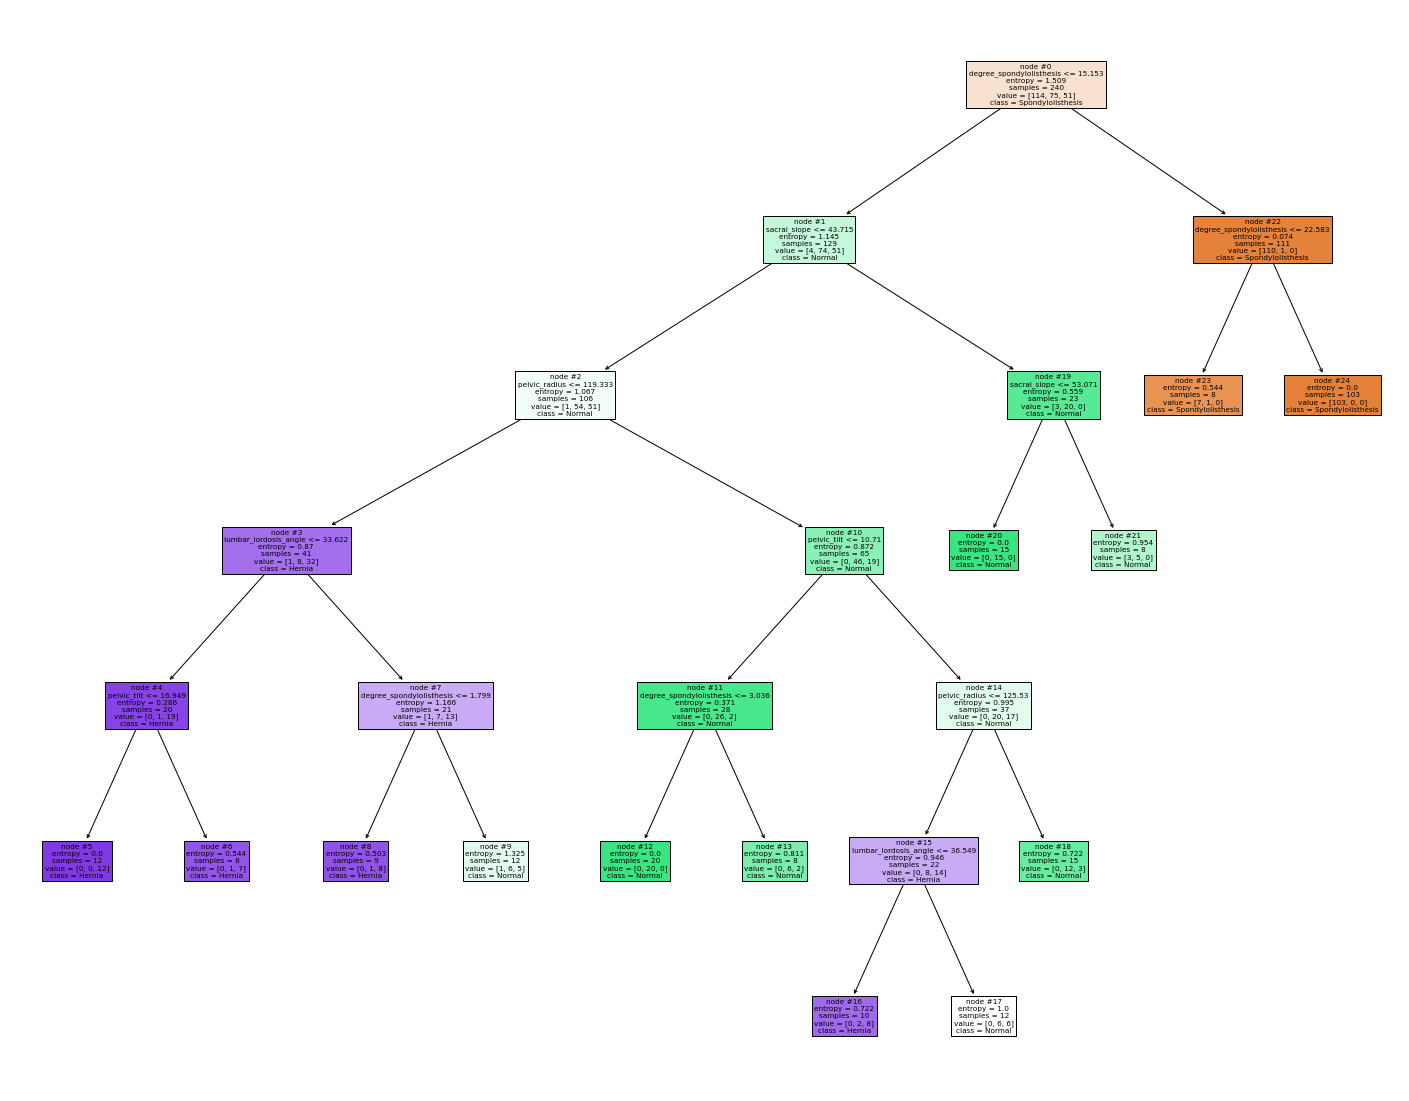

In [261]:
fig = plt.figure(figsize=(25,20))
tree1 = tree.plot_tree(dt1, 
                       feature_names=X3.columns, class_names=['Spondylolisthesis', 'Normal', 'Hernia'], 
                       node_ids=True, 
                       filled=True)

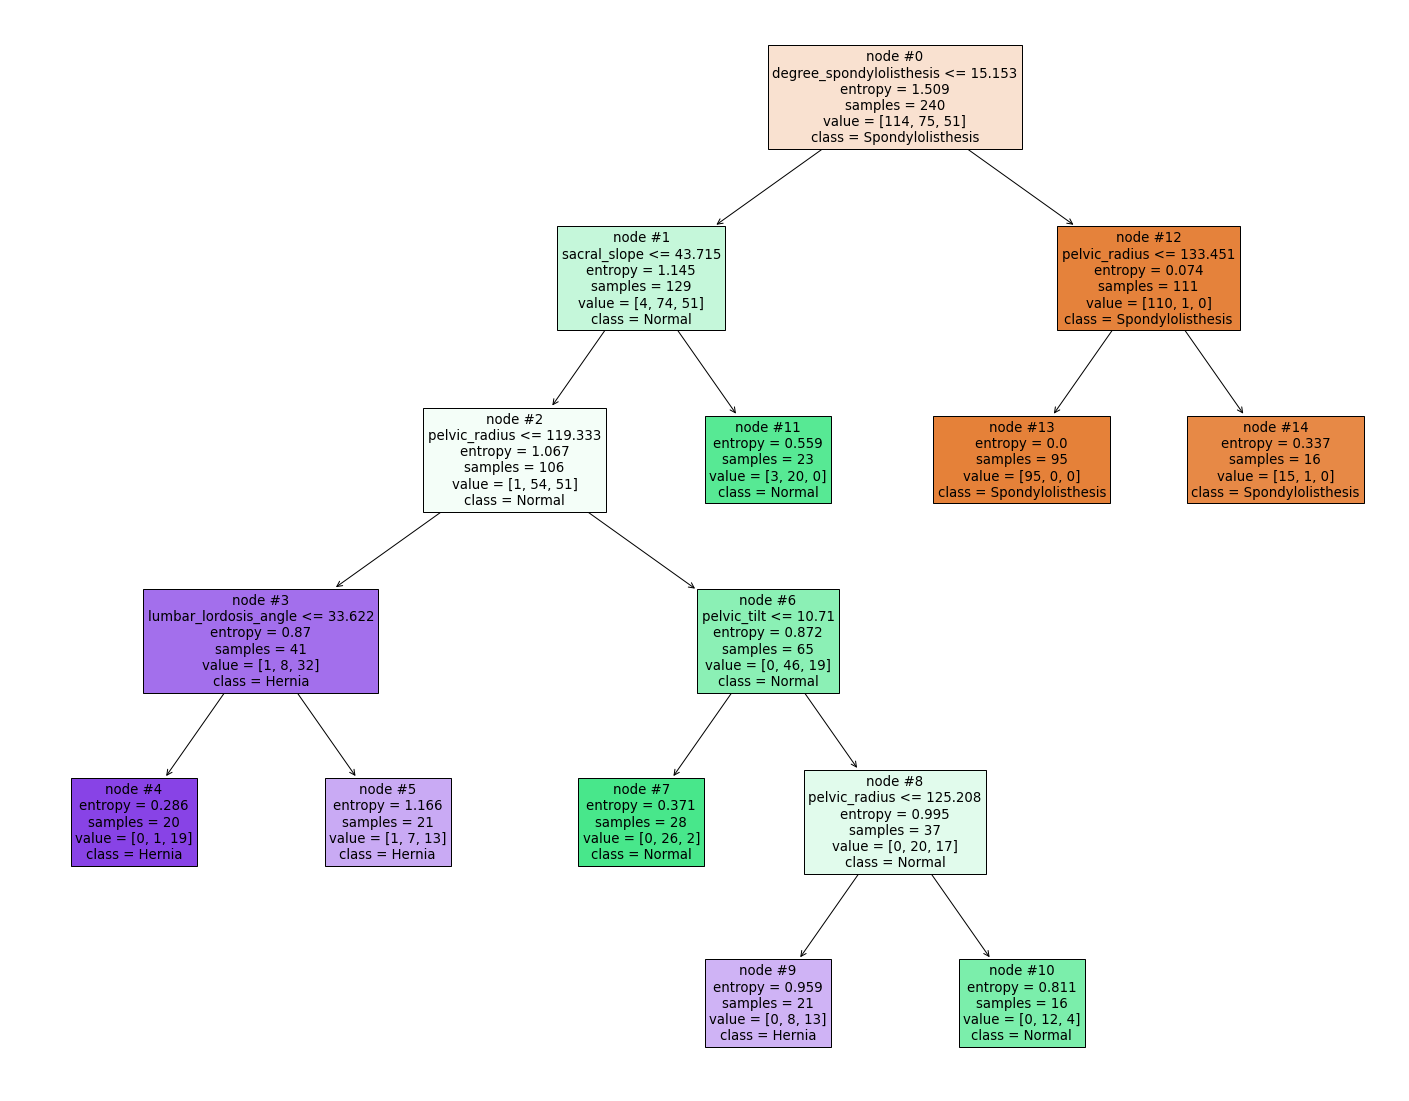

In [262]:
fig = plt.figure(figsize=(25,20))
tree2 = tree.plot_tree(dt2, 
                       feature_names=X3.columns, 
                       class_names=['Spondylolisthesis', 'Normal', 'Hernia'],
                       node_ids=True,
                       filled=True)

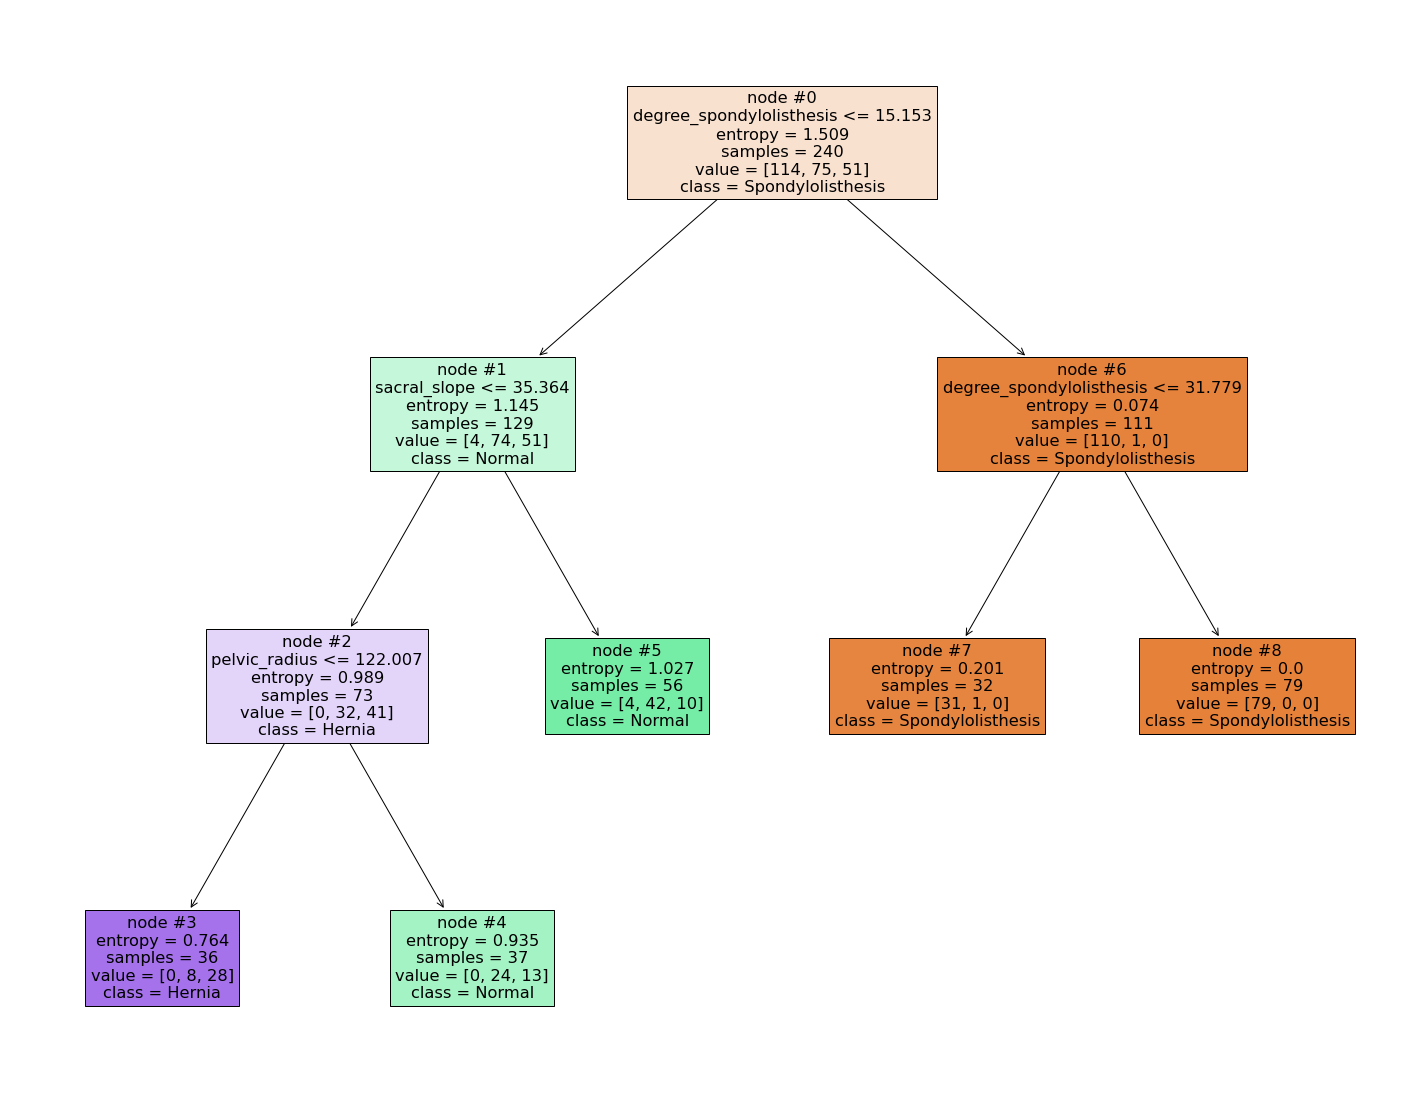

In [263]:
fig = plt.figure(figsize=(25,20))
tree3 = tree.plot_tree(dt3, 
                       feature_names=X3.columns, 
                       class_names=['Spondylolisthesis', 'Normal', 'Hernia'], 
                       node_ids=True,
                       filled=True)


### Comparative Analysis of the Decision Trees

Following is a summary and the analysis of the three decision trees obtained by changing the values of the hyperparameter _'min_samples_leaf'_ to {_8, 16, 32_} [min_samples_leaf is a hyperparameter that gievrns the minimum number of datapoints to be present in a node after a split is carried out. Its function is make the model robust to outliers and, thus, reduce overfitting ]. The criteria used to calculate the information gain is the **'entropy'**

To summarize the decision trees, we examine first the decision tree itself by looking at the number of nodes created(splits), the values at which the split is carried out, the depth of the trees and the information gain at eaxh stage.


| Min Points per leaf node|8|16|32|
|-------------------------|-|--|--|
| Total Number of nodes   |28|16|10|
|Maximum Depth            |7|5 |4 |

<br>

It is worth noting that all the three trees made the first split at _degree_spondylolisthesis <= 15.15_ . <br>All the nodes to the right of the split i.e. with _degree_spondylolisthesis >= 15.15_ are classified as **Spondylolisthesis** in all the trees. This suggest heavy correlation between high values of _degree_spondylolisthesis_ and the diagnosis. <br>
Looking at ths information, the trees with greater depth and higher number of nodes do not provide any additinal information through further splits. However, the difference in the trees arises for values of _degree_spondylolisthesis <= 16.08_.<br>The second split for all the three trees is common too at _sacral _slope_.

The entropy at the leaf nodes is high in the Third DT because of high impurity at the leaf nodes. It could be explained in the Decision Tree 3 as a case of underfitting however, for Decision Tree 1 could be overfitting which can explain the low entropy of the nodes. <br>It is also interesting to note that in the Decision Tree 1 & 2, a split decision at node 8 (in Decision Tree 2) and node 15 ( in Decision tree 1) causes the model to classify certain points as **Normal**. It may be that the model is overfitting since the resulting nodes have high impurity or it may be a discernible opportunity to improve the model which the Decision Tree 3 did not get because of the constraint. 

In [241]:
y3_1_pred = model1.predict(X3_test)
y3_2_pred = model2.predict(X3_test)
y3_3_pred = model3.predict(X3_test)

In [242]:
    
display('CONFUSION MATRIX FOR THE THREE DECISION TREES','Decision Tree with min_samples_leaf =   8', 
        pd.DataFrame(cm(y3_test, y3_1_pred), 
                     index=['Actual Spondylolisthesis', 'Actual Normal', 'Actual Hernia'], 
                     columns=['Predicted Spondylolisthesis', 'Predicted Normal', ' Predicted Hernia']),
        'Decision Tree with min_samples_leaf =   16',
        pd.DataFrame(cm(y3_test, y3_2_pred), 
                     index=['Actual Spondylolisthesis', 'Actual Normal', 'Actual Hernia'], 
                     columns=['Predicted Spondylolisthesis', 'Predicted Normal', ' Predicted Hernia']),
        'Decision Tree with min_samples_leaf =   32' ,
        pd.DataFrame(cm(y3_test, y3_3_pred), 
                     index=['Actual Spondylolisthesis', 'Actual Normal', 'Actual Hernia'], 
                     columns=['Predicted Spondylolisthesis', 'Predicted Normal', ' Predicted Hernia']))

'CONFUSION MATRIX FOR THE THREE DECISION TREES'

'Decision Tree with min_samples_leaf =   8'

,Predicted Spondylolisthesis,Predicted Normal,Predicted Hernia
Actual Spondylolisthesis,36,0,0
Actual Normal,9,16,0
Actual Hernia,7,2,0


'Decision Tree with min_samples_leaf =   16'

,Predicted Spondylolisthesis,Predicted Normal,Predicted Hernia
Actual Spondylolisthesis,36,0,0
Actual Normal,12,13,0
Actual Hernia,9,0,0


'Decision Tree with min_samples_leaf =   32'

,Predicted Spondylolisthesis,Predicted Normal,Predicted Hernia
Actual Spondylolisthesis,35,1,0
Actual Normal,6,19,0
Actual Hernia,6,3,0


In [243]:
classes = ['Spondylolisthesis', 'Normal', 'Hernia']
print(classification_report(y3_test, y3_1_pred, target_names=classes), 
      classification_report(y3_test, y3_2_pred, target_names=classes), 
      classification_report(y3_test, y3_3_pred, target_names=classes))

                   precision    recall  f1-score   support

Spondylolisthesis       0.69      1.00      0.82        36
           Normal       0.89      0.64      0.74        25
           Hernia       0.00      0.00      0.00         9

         accuracy                           0.74        70
        macro avg       0.53      0.55      0.52        70
     weighted avg       0.67      0.74      0.69        70
                    precision    recall  f1-score   support

Spondylolisthesis       0.63      1.00      0.77        36
           Normal       1.00      0.52      0.68        25
           Hernia       0.00      0.00      0.00         9

         accuracy                           0.70        70
        macro avg       0.54      0.51      0.49        70
     weighted avg       0.68      0.70      0.64        70
                    precision    recall  f1-score   support

Spondylolisthesis       0.74      0.97      0.84        36
           Normal       0.83      0.76      0.79 

C:\Users\nsengar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



#### __Confusion Matrix__


##### **Decision Tree with min_samples_leaf =   8 (Decision Tree 4)**

|                         |Predicted Spondylolisthesis |Predicted Normal|Predicted Hernia |
|-------------------------|----------------------------|----------------|-----------------|
|Actual Spondylolisthesis |	            35 	           | 1              | 0               | 
| Actual Normal           |                    2       |	19          | 4               |
| Actual Hernia           |                    1       |	6           | 2               |

##### **Decision Tree with min_samples_leaf =   16 (Decision Tree 5)**

|                         |Predicted Spondylolisthesis |Predicted Normal|Predicted Hernia |
|-------------------------|----------------------------|----------------|-----------------|
|Actual Spondylolisthesis |	            35 	           | 1              | 0               | 
| Actual Normal           |                    2       |	15          | 8               |
| Actual Hernia           |                    1       |	3           | 5               |


##### **Decision Tree with min_samples_leaf =   32 (Decision Tree 6)**

|                         |Predicted Spondylolisthesis |Predicted Normal|Predicted Hernia |
|-------------------------|----------------------------|----------------|-----------------|
|Actual Spondylolisthesis |	            35 	           | 1              | 0               | 
| Actual Normal           |                    2       |	20          | 3               |
| Actual Hernia           |                    1       |	5           | 3               |
           

#### __Model Scores__
##### **Decision Tree with min_samples_leaf =   8 (Decision Tree 4)**


|                  | precision  |  recall | f1-score |  support |
|------------------|------------|---------|----------|----------|
|Spondylolisthesis |      0.92  |    0.97 |    0.95  |     36   |
|  Normal          |      0.73  |    0.76 |    0.75  |     25   |
|  Hernia          |      0.33  |    0.22 |    0.27  |     9    |
|Accuracy          |            |         |    0.80  |     70   |

##### **Decision Tree with min_samples_leaf =   16 (Decision Tree 5)**

|                  | precision  |  recall | f1-score |  support |
|------------------|------------|---------|----------|----------|
|Spondylolisthesis |      0.92  |    0.97 |    0.95  |     36   |
|  Normal          |      0.79  |    0.60 |    0.68  |     25   |
|  Hernia          |      0.33  |    0.56 |    0.45  |     9    |
|Accuracy          |            |         |    0.79  |     70   |


##### **Decision Tree with min_samples_leaf =   32 (Decision Tree 6)**

|                  | precision  |  recall | f1-score |  support |
|------------------|------------|---------|----------|----------|
|Spondylolisthesis |      0.92  |    0.97 |    0.95  |     36   |
|  Normal          |      0.77  |    0.80 |    0.78  |     25   |
|  Hernia          |      0.50  |    0.33 |    0.40  |     9    |
|Accuracy          |            |         |    0.83  |     70   |



#####  Analysis:

||Decision Tree 1|Decision Tree 2|Decision Tree 3|
|-|-|-|-|
|Number of points misclassified as Normal|7|4|6|
|Number of points misclassified the wrong disease|1|1|1|

Observing the above data, we can see that the decision tree 1 (min_samples_leaf=32) has the highest accuracy and f1-score among all the three models and thus can be easily concluded to be the best model.<br><br> However, looking closer at the confusion matrix, to guage the actual potential of the model in correctly identifying the abnormal cases, we come across an entirely different story, we can see that the decision tree 1 has misclassified 7 Abnormal cases as Normal, while the misclassification error (Classifying Abnormal as Normal) of the decision tree 3 (with min_samples_leaf=32) is 6. <br>Considering the cost of misclassification in this case i.e. diagnosing a medical condition, misclassification carries with it huge costs for both the patient, the health care institutions like the Hospitals and Insurance agencies. <br>Therefore, concluding that the Decision Tree 1 or 3 is the best can have grave consequences in real life. By this criterion, one may conclude however that the Decision Tree 2 is the best classifier model among the three as it has the lowest rate of False Negatives.

### Dropping the feature 'degree_spondylolisthesis' which was the root node split in earlier trees 

In [162]:
df2 = raw2.drop('degree_spondylolisthesis', axis=1)

In [201]:
df2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,0


In [164]:
X2 = df2.drop('class', axis=1).copy()
y2 = df2['class'].copy()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=70, random_state=42 )

y2_train.value_counts()

X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

k = [8, 16, 32]
dt1 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=8)
dt2 = DecisionTreeClassifier(criterion = 'entropy',min_samples_leaf=16)
dt3 = DecisionTreeClassifier(criterion = 'entropy',min_samples_leaf=32)

model1 = dt1.fit(X2_train, y2_train)
model2 = dt2.fit(X2_train, y2_train)
model3 = dt3.fit(X2_train, y2_train)


Having dropped the column 'degree_spondylolisthesis', we train the decision tree classidier on the new dataset and Export the splitting criteria at each node.

In [165]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'
    
# TO export the decision tree summary as text
from sklearn.tree import export_text
tree1_rules = export_text(dt1, feature_names=list(X2.columns))
tree2_rules = export_text(dt2, feature_names=list(X2.columns))
tree3_rules = export_text(dt3, feature_names=list(X2.columns))

print(color.BOLD + 'Decision Tree with min_samples_leaf =   8' + color.END, '\n\n', tree1_rules,'\n',
      color.BOLD + 'Decision Tree with min_samples_leaf =  16' + color.END, '\n\n', tree2_rules,'\n',
      color.BOLD + 'Decision Tree with min_samples_leaf =  32' + color.END, '\n\n', tree3_rules)

Decision Tree with min_samples_leaf =   8 

 |--- pelvic_incidence <= 69.48
|   |--- pelvic_radius <= 112.92
|   |   |--- pelvic_incidence <= 54.04
|   |   |   |--- class: 0
|   |   |--- pelvic_incidence >  54.04
|   |   |   |--- pelvic_radius <= 103.49
|   |   |   |   |--- class: 0
|   |   |   |--- pelvic_radius >  103.49
|   |   |   |   |--- class: 0
|   |--- pelvic_radius >  112.92
|   |   |--- pelvic_tilt numeric <= 16.56
|   |   |   |--- pelvic_radius <= 118.07
|   |   |   |   |--- pelvic_incidence <= 47.82
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- pelvic_incidence >  47.82
|   |   |   |   |   |--- class: 1
|   |   |   |--- pelvic_radius >  118.07
|   |   |   |   |--- sacral_slope <= 35.60
|   |   |   |   |   |--- pelvic_incidence <= 43.61
|   |   |   |   |   |   |--- lumbar_lordosis_angle <= 36.02
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- lumbar_lordosis_angle >  36.02
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- pel

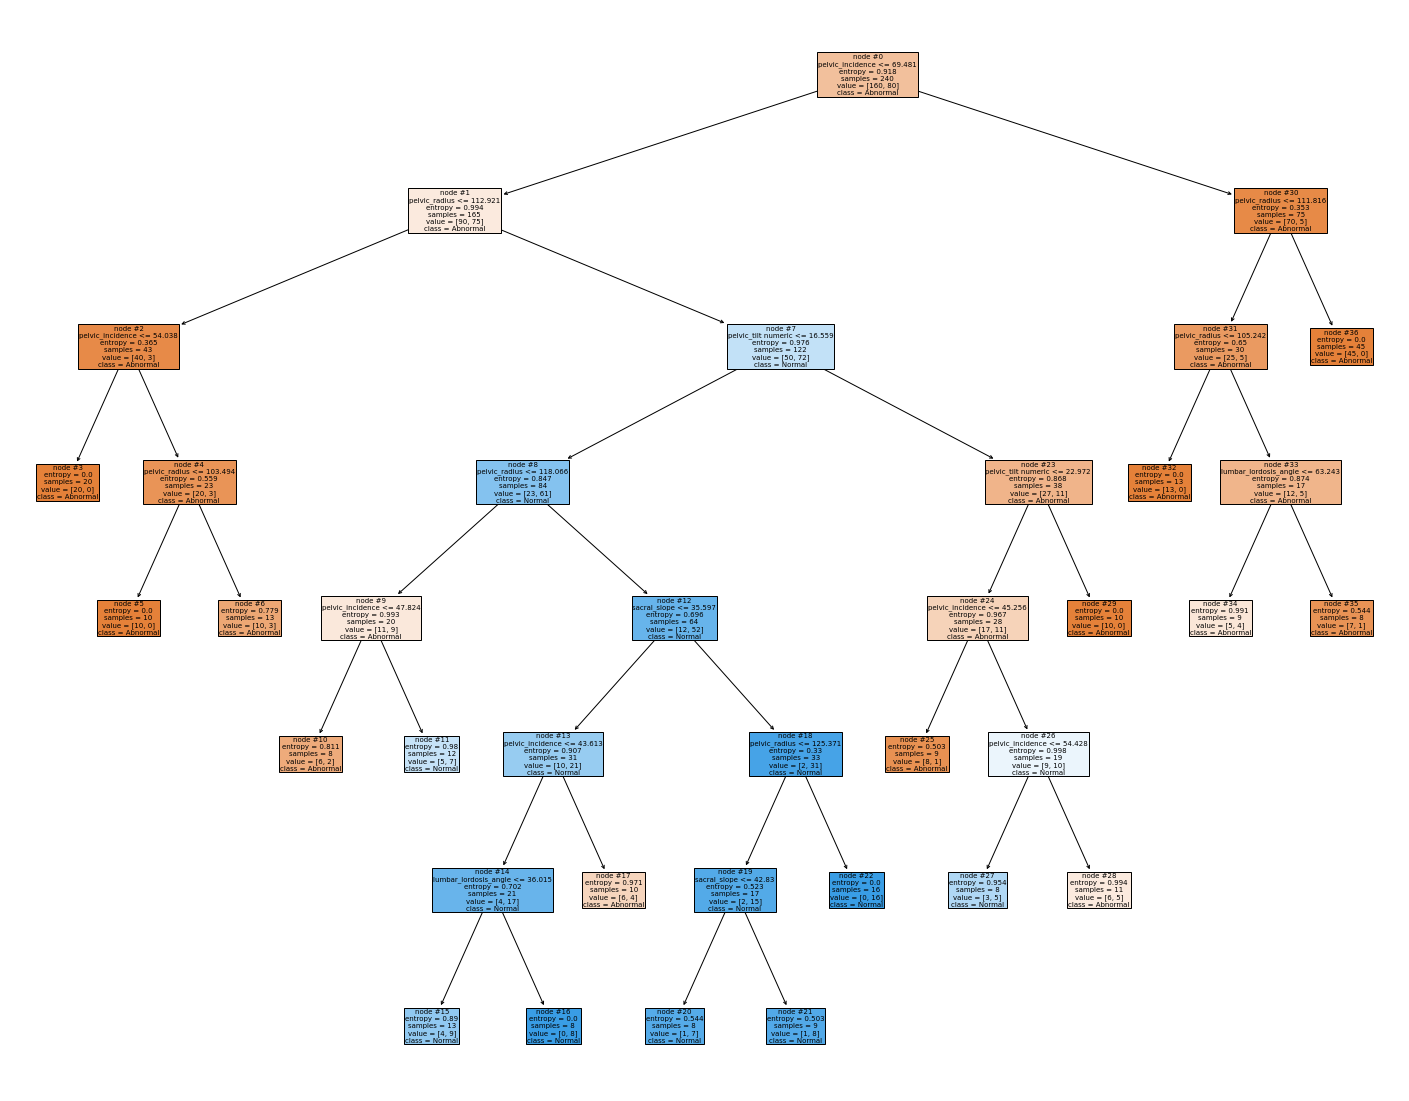

In [174]:
fig = plt.figure(figsize=(25,20))
tree3 = tree.plot_tree(dt1, 
                       feature_names=X2.columns, 
                       class_names=['Abnormal','Normal'], 
                       node_ids=True, 
                       filled=True)



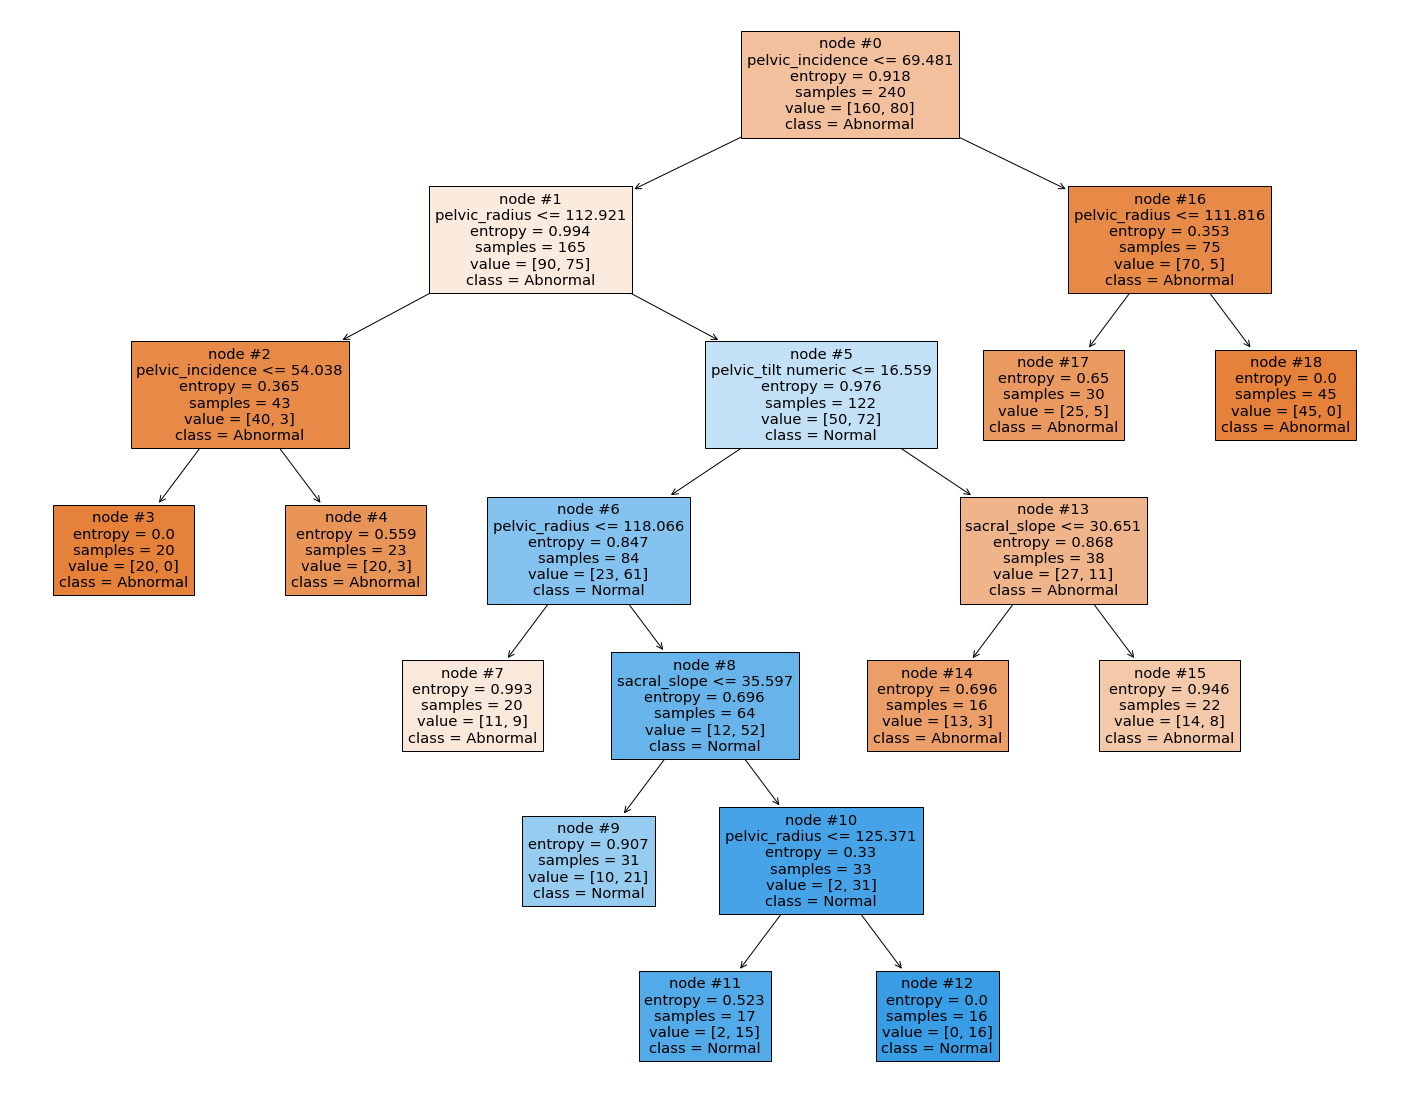

In [167]:
fig = plt.figure(figsize=(25,20))
tree3 = tree.plot_tree(dt2, 
                       feature_names=X2.columns, 
                       class_names=['Abnormal','Normal'], 
                       node_ids=True, 
                       filled=True)


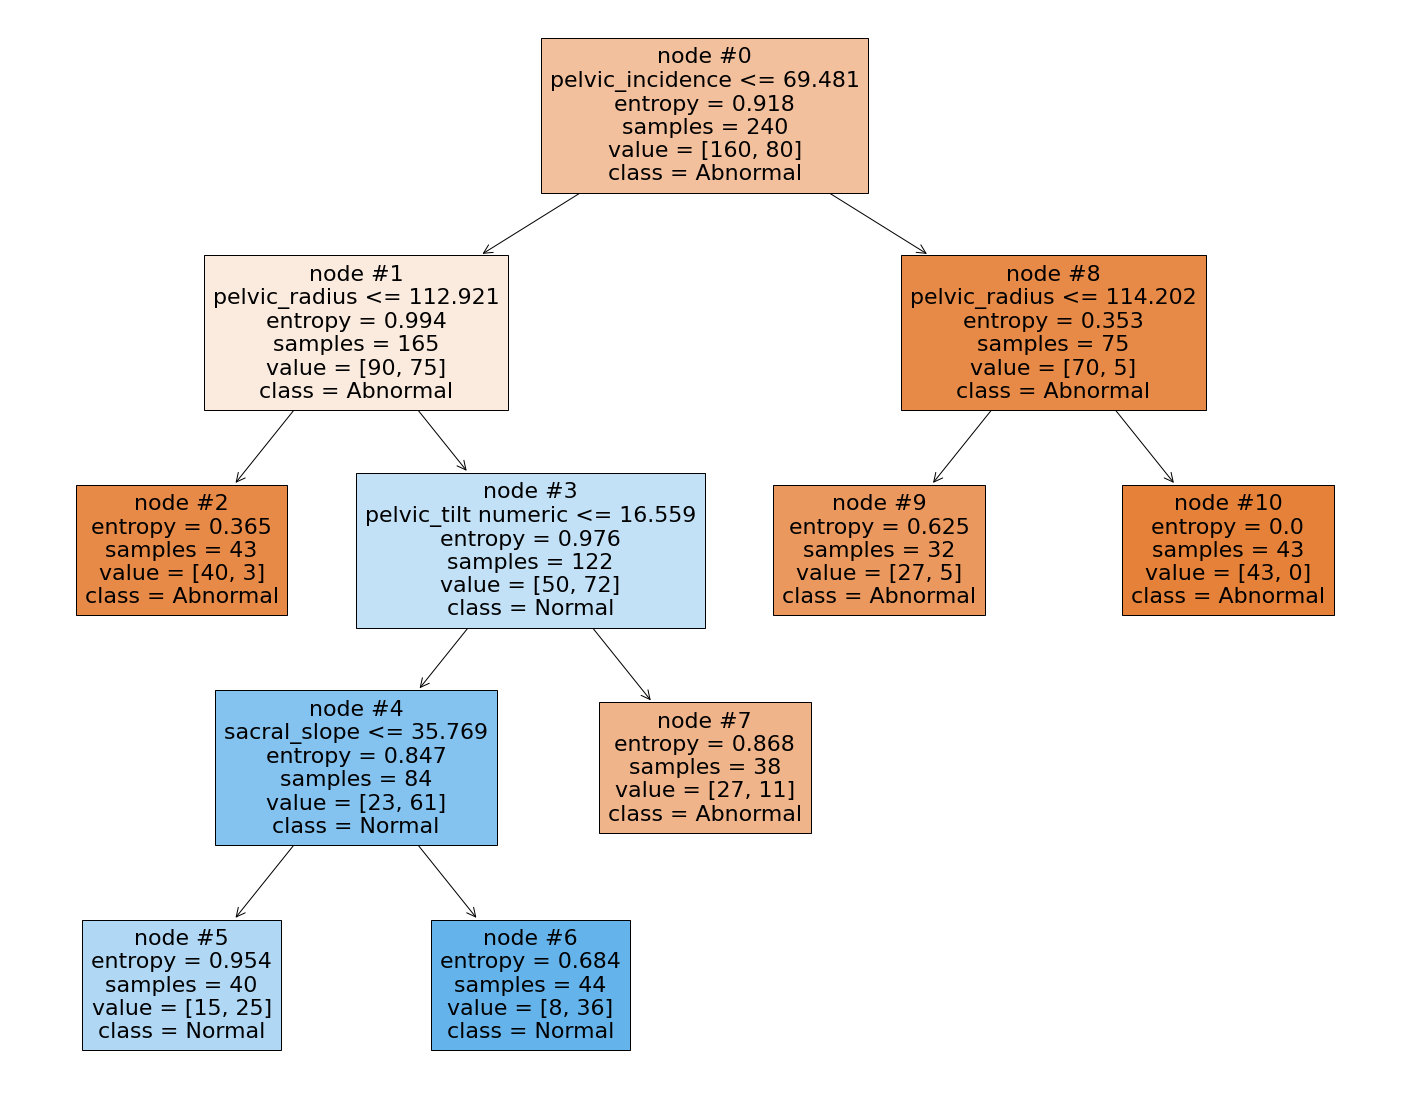

In [168]:
fig = plt.figure(figsize=(25,20))
tree3 = tree.plot_tree(dt3, 
                       feature_names=X2.columns, 
                       class_names=['Abnormal','Normal'], 
                       node_ids=True, 
                       filled=True)



### Comparative Analysis of the Decision Trees

Following is a summary and the analysis of the three decision trees obtained by changing the values of the hyperparameter _'min_samples_leaf'_ to {_8, 16, 32_} [min_samples_leaf is a hyperparameter that gievrns the minimum number of datapoints to be present in a node after a split is carried out. Its function is make the model robust to outliers and, thus, reduce overfitting ]. Thus, it is reasonable to expect a Decision Tree with lower min_samples_leaf to have more nodes and a larger depth.<br>The criteria used to calculate the information gain is the **'entropy'**

To summarize the decision trees, we examine first the decision tree itself by looking at the number of nodes created(splits), the values at which the split is carried out, the depth of the trees and the information gain at eaxh stage.


| Min Points per leaf node|8|16|32|
|-------------------------|-|--|--|
| Total Number of nodes   |36|18|10|
|Maximum Depth            |7|6 |4 |

<br>

It is worth noting that all the three trees made the first split at _pelvic_incidence > 69.48_ . <br>All the nodes to the right of the split i.e. with _pelvic_incidence > 69.48_ are classified as **Abnormal** in all the trees. This suggest heavy correlation between high values of _pelvic_incidence_ and the diagnosis. <br>

Looking at ths information, the trees with greater depth and higher number of nodes do not provide any additinal information through further splits. For example, it is important to observe that in the Decision Tree 1, for the points _pelvic_incidence > 69.48_, although the decision tree splits multiple times (from the node 30), the classification for all the points is **Abnormal**, making those splits redundant. The same can be observed at other nodes as well like node 2 and 18. This may lead to overfitting. <br>

The same issue can be seen in the Decision Tree 2, even though it is far less pronounced compared to the previos Decision Tree. The split at nodes 2, 8, 13, 6 do not add any new information to the model and are thus redundant. 

The third Decision Tree with a significantly higher restriction on the minimum number of points on the leaf node, does not grow very large and stops at max dept=4. The splits are more or less the same as earlier tree suggesting that the tree has captured most if not all the information in the dataset.


To assess which of the trees is the best, we must look towards the information gained by the trees by being able to perform more splits compared to the Tree 3. Tree 1 and 2 do appear to be finding more information when compared to the Tree 3 (by observing node #3 in both the trees), however, Tree 1 does not gain any forther information by making further splits as the lower nodes are still classified as **Normal**. Therefore, It would appear that the **Tree 3 is the best among the three on the basis of information gained in minimum tree size**. We can make further evaluation once we observe the test statistics.

In [169]:
y2_1_pred = model1.predict(X2_test)
y2_2_pred = model2.predict(X2_test)
y2_3_pred = model3.predict(X2_test)

In [268]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'
    
print(color.BOLD + 'CONFUSION MATRIX FOR THE THREE DECISION TREES' + color.END)

display('Decision Tree with min_samples_leaf =   8', 
        pd.DataFrame(cm(y2_test, y2_1_pred), 
                     index=['Actual Abnormal', 'Actual Normal'], 
                     columns=['Predicted Abnormal', 'Predicted Normal']),
        'Decision Tree with min_samples_leaf =   16',
        pd.DataFrame(cm(y2_test, y2_2_pred), 
                     index=['Actual Abnormal', 'Actual Normal'], 
                     columns=['Predicted Abnormal', 'Predicted Normal']),
        'Decision Tree with min_samples_leaf =   32' ,
        pd.DataFrame(cm(y2_test, y2_3_pred), 
                     index=['Actual Abnormal', 'Actual Normal'], 
                     columns=['Predicted Abnormal', 'Predicted Normal']))

CONFUSION MATRIX FOR THE THREE DECISION TREES


'Decision Tree with min_samples_leaf =   8'

,Predicted Abnormal,Predicted Normal
Actual Abnormal,44,6
Actual Normal,9,11


'Decision Tree with min_samples_leaf =   16'

,Predicted Abnormal,Predicted Normal
Actual Abnormal,48,2
Actual Normal,14,6


'Decision Tree with min_samples_leaf =   32'

,Predicted Abnormal,Predicted Normal
Actual Abnormal,47,3
Actual Normal,6,14


In [171]:
classes = ['Abnormal', 'Normal']
print(classification_report(y2_test, y2_1_pred, target_names=classes), 
      classification_report(y2_test, y2_2_pred, target_names=classes), 
      classification_report(y2_test, y2_3_pred, target_names=classes))

              precision    recall  f1-score   support

    Abnormal       0.79      0.82      0.80        50
      Normal       0.50      0.45      0.47        20

    accuracy                           0.71        70
   macro avg       0.64      0.64      0.64        70
weighted avg       0.71      0.71      0.71        70
               precision    recall  f1-score   support

    Abnormal       0.80      0.88      0.84        50
      Normal       0.60      0.45      0.51        20

    accuracy                           0.76        70
   macro avg       0.70      0.67      0.68        70
weighted avg       0.74      0.76      0.75        70
               precision    recall  f1-score   support

    Abnormal       0.78      0.80      0.79        50
      Normal       0.47      0.45      0.46        20

    accuracy                           0.70        70
   macro avg       0.63      0.62      0.63        70
weighted avg       0.70      0.70      0.70        70



Observing the metrics obtained on the test dataset, one can easily notice that the accuracy of the three models is lower than the earlier models trined on the complete dataset, sugesting that a lot of predictive potential was lost on dropping the column _degree_spondylolisthesis_. <br>

The decision tree 2 outperforms noth the others trees sugesting that the decision tree 1 (with min_samples_leaf=8) must be overfitting the data while decision tree 3 (with min_samples_leaf=32) might be underfitting the data. The number of misclassifications can be observed from the confusion matrices and we can conclude that the deicsion tree 2 outperforms the other models (FalsePositive(FP)=11, FalseNegative(FN)=6) vs (FP=11, FN=9) for the Decision Tree 1 and (FP=11, FN=10) for the decision tree 3. 

<br>THus it is reasonable to conclude that the decision tree 2 is the best among three even with the truncated dataset.


We observe that revised splitting decision at the root node has been carried at the 'pelvic_incidence' (><69.48). This decision criteria was not present at all in any tree in the previous iterations with the complete dataset. This is interesting and needs to be investigated further. This might suggest a high correlation between the features 'degree_spondylolisthesis' and 'pelvic_incidence' thus by splitting the dataset at 'degree_spondylolisthesis', the earlier trees might have gleaned all the information that could have been recieved from the 'pelvic_incidence' feature. We will investigate this through a correlation matrix.

<AxesSubplot:>

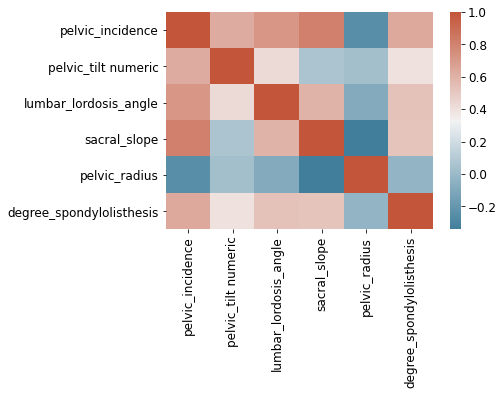

In [200]:
corr = raw2.drop('class', axis=1).corr(method = 'pearson')
sns.heatmap(corr, cmap = sns.diverging_palette(230, 20, as_cmap=True))

In [198]:
raw2.drop('class', axis=1).corr(method = 'pearson')


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


We see that the feature 'pelvic_incidence' is highly correlated with the feature 'degree_spondylolisthesis', in fact, 'pelvic_incidence' has the highest correlation coefficients among all the features to the 'degree_spondylolisthesis', which, in retrospect, seems logical. The Decision tree would perform the split at the next best feature, which in this case happens to be 'pelvic_incidence'.

The values of accurancy and precision are also much worse that in the previous cases which can again be attributed to information lost by truncating the dataset, which makes sense because removing the feature with the highest predictive potential would imapct the results negatively. 


The misclassification error is significantly higher in these models as well.

$$ X $$